In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.preprocessing     # For StandardScaler
import sklearn.linear_model      # For LogisticRegression
import sklearn.neural_network    # For MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


# Load Dataset

In [47]:
data = pd.read_csv("datasets/processed_dex_final.csv")
data

,Unnamed: 0,id,is_malicious,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,32
0,0,0864acb063671894c80220d3f77cbcdcb08f4aabf017cf...,1,2718.239393,1125.543435,1038.811133,920.025796,861.766204,810.089682,746.668342,...,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,8.969419e-14
1,1,477c68553ff88f831026e8842fe99fe14b2ddf08821a0c...,1,3048.841863,1084.342463,1003.619579,946.339372,848.429008,821.552961,760.381661,...,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,8.621432e-14
2,2,a0371b342482a12a1932b6930f24c5cb84226c325d9e25...,1,3121.137775,1133.301389,1047.593803,902.596307,807.939970,771.697648,722.248531,...,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,1.081333e-13
3,3,26d4ebb9a6693d71077f86794f28f1480db6d096c95ecb...,1,3182.089564,1156.645792,988.701177,961.084358,882.594958,795.379718,737.981924,...,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,1.476048e-13
4,4,361c51f12ffc337eb1293a1f49c1a5034ca708a9a46ac4...,1,2756.747112,1114.727262,1046.478482,945.737289,901.044547,858.141550,790.233702,...,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.626257e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,10773,Sha256_000C32D446A831E36F727F1331B0579FFC6EF8E...,0,3108.395999,1108.018160,986.675408,929.016497,838.867308,761.316200,714.684240,...,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.820447e-14
10774,10774,Sha256_000869C011E1C7D6A0DF34BB712A2851E736B9C...,0,3084.359987,1027.243597,973.700132,879.385231,873.197480,844.192095,795.711960,...,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,4.507240e-14
10775,10775,Sha256_000C3CF07E99F07C41C685E10978410238609A0...,0,3047.595636,1081.506514,1033.233856,889.461201,805.590885,769.233444,712.997871,...,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,8.638476e-14
10776,10776,Sha256_00223AD0498407AF755A9C8D842C9FA5EDCF2E2...,0,3146.497985,1081.958962,1054.311194,935.137177,838.086214,792.626381,764.729431,...,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,1.110579e-13


In [48]:
X = data.drop(['Unnamed: 0', "id", "is_malicious"], axis=1)  # Features
y = data["is_malicious"]  # Label

In [49]:
X = X.to_numpy().astype('float32' )
y = y.to_numpy().astype('int32')

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [51]:
print("X:", X_train.shape, X_train.dtype)
print("y:", y_train.shape, y_train.dtype)

X: (8622, 32) float32
y: (8622,) int32


In [52]:
#prepocess data
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
Performance = pd.DataFrame()
Metrics=['Accuracy','Recall','Precision','F1-score']
Performance['Metrics'] = Metrics

# Decision tree

In [54]:
dt=sklearn.tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)



In [55]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 100.00%
Train f1 : 82.93%
Train recall : 100.00%
Train precision : 100.00%


In [56]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Decision Tree'] = [acc,recall,precision,f1]

Test accuracy : 81.03%
Test f1 : 81.91%
Test recall : 82.02%
Test precision : 81.80%


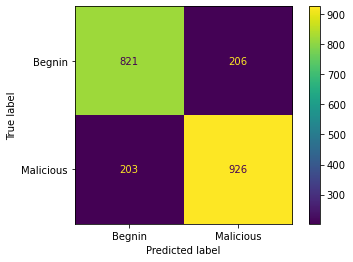

In [58]:
plot_confusion_matrix(dt, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# Random Forest

In [59]:
rf=sklearn.ensemble.RandomForestClassifier(random_state=0,n_estimators=3)
rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [60]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 96.80%
Train f1 : 81.91%
Train recall : 96.67%
Train precision : 97.07%


In [61]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Random Forest'] = [acc,recall,precision,f1]

Test accuracy : 82.37%
Test f1 : 82.93%
Test recall : 81.75%
Test precision : 84.14%


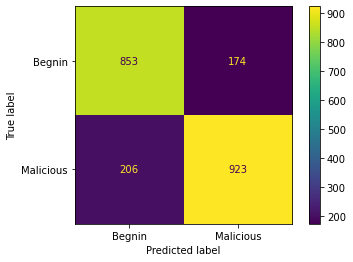

In [67]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# Logistic Regression

In [ ]:
lr = sklearn.linear_model.LogisticRegression(C=0.01, random_state=0)  # C=0.01 from Exercise 1.4
lr.fit(X_train, y_train)

In [ ]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

In [ ]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['LR'] = [acc,recall,precision,f1]

In [ ]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# KNN

In [45]:
for k in range(2,8):
    knn = neigh =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    acc_train = sklearn.metrics.accuracy_score(y_pred_train, y_train)
    acc_test = sklearn.metrics.accuracy_score(y_pred_test, y_test)
    print('Train accuracy : %.2f%%'% (100*acc_train))
    print('Test accuracy : %.2f%%'% (100*acc_test))

Train accuracy : 93.06%
Test accuracy : 83.95%
Train accuracy : 91.30%
Test accuracy : 85.20%
Train accuracy : 89.23%
Test accuracy : 83.91%
Train accuracy : 88.66%
Test accuracy : 85.20%
Train accuracy : 87.71%
Test accuracy : 83.72%
Train accuracy : 87.23%
Test accuracy : 84.51%


In [63]:
knn = neigh =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [64]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 91.30%
Train f1 : 82.93%
Train recall : 92.46%
Train precision : 90.74%


In [65]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['KNN'] = [acc,recall,precision,f1]

Test accuracy : 85.20%
Test f1 : 85.83%
Test recall : 85.56%
Test precision : 86.10%


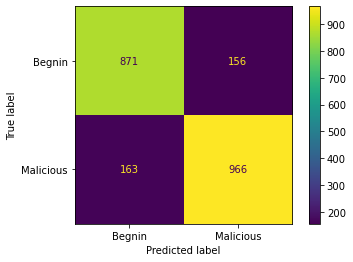

In [66]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# GAUSSIAN NB

In [70]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [71]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 64.32%
Train f1 : 85.83%
Train recall : 49.02%
Train precision : 72.47%


In [72]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Gaussian Naive Bayes'] = [acc,recall,precision,f1]

Test accuracy : 65.31%
Test f1 : 60.38%
Test recall : 50.49%
Test precision : 75.10%


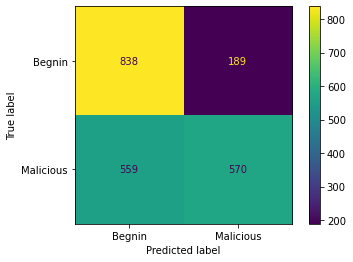

In [74]:
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# MLP

In [75]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(60,20,5),
                                           solver='sgd', batch_size=32, max_iter=100,
                                           learning_rate_init=.01, momentum=0.9,
                                           verbose=True, random_state=0)

mlp.fit(X_train, y_train);

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

Iteration 1, loss = 0.51715233
Iteration 2, loss = 0.41353243
Iteration 3, loss = 0.39080840
Iteration 4, loss = 0.37712237
Iteration 5, loss = 0.36439416
Iteration 6, loss = 0.35551110
Iteration 7, loss = 0.34779378
Iteration 8, loss = 0.35136822
Iteration 9, loss = 0.33205568
Iteration 10, loss = 0.32670006
Iteration 11, loss = 0.31816344
Iteration 12, loss = 0.30933417
Iteration 13, loss = 0.30699412
Iteration 14, loss = 0.29903401
Iteration 15, loss = 0.29331123
Iteration 16, loss = 0.28753079
Iteration 17, loss = 0.28393225
Iteration 18, loss = 0.28169908
Iteration 19, loss = 0.27728650
Iteration 20, loss = 0.27417610
Iteration 21, loss = 0.26659716
Iteration 22, loss = 0.26114871
Iteration 23, loss = 0.26154023
Iteration 24, loss = 0.25811051
Iteration 25, loss = 0.26971596
Iteration 26, loss = 0.25810134
Iteration 27, loss = 0.24845448
Iteration 28, loss = 0.24164091
Iteration 29, loss = 0.24286444
Iteration 30, loss = 0.23714559
Iteration 31, loss = 0.23328735
Iteration 32, los

C:\Program Files\Anaconda3\envs\py38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 94.33%
Train f1 : 60.38%
Train recall : 91.36%
Train precision : 97.42%


In [77]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['MLP'] = [acc,recall,precision,f1]

Test accuracy : 84.14%
Test f1 : 84.25%
Test recall : 81.05%
Test precision : 87.73%


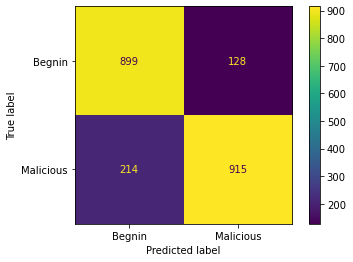

In [78]:
plot_confusion_matrix(mlp, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# SVM

In [79]:
y_train_svm = y_train*2 - 1
y_test_svm = y_test*2-1
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X_train, y_train_svm)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [80]:
t_acc = accuracy_score(y_train_svm, y_pred_train)
t_f1 = f1_score(y_train_svm, y_pred_train)
t_recall = recall_score(y_train_svm, y_pred_train)
t_precision = precision_score(y_train_svm, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 78.79%
Train f1 : 84.25%
Train recall : 80.97%
Train precision : 78.36%


In [82]:
acc = accuracy_score(y_test_svm, y_pred_test)
f1 = f1_score(y_test_svm, y_pred_test)
recall = recall_score(y_test_svm, y_pred_test)
precision = precision_score(y_test_svm, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['SVM'] = [acc,recall,precision,f1]

Test accuracy : 79.36%
Test f1 : 80.44%
Test recall : 81.05%
Test precision : 79.84%


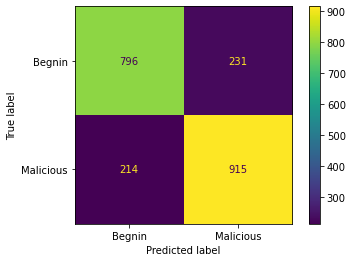

In [90]:
plot_confusion_matrix(svm, X_test, y_test_svm, display_labels=['Begnin','Malicious']) 
plt.show()

# ADA BOOSTING

In [85]:
AdaB= AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=0).fit(X_train,y_train)

y_pred_train = AdaB.predict(X_train)
y_pred_test = AdaB.predict(X_test)

In [86]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 64.17%
Train f1 : 80.44%
Train recall : 41.32%
Train precision : 78.64%


In [87]:
acc = accuracy_score(y_test_svm, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc))
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall))
print('Test precision : %.2f%%'% (100*precision))

Performance['Ada Boosting'] = [acc,recall,precision,f1]

Test accuracy : 21.75%
Test f1 : 54.79%
Test recall : 41.54%
Test precision : 80.45%


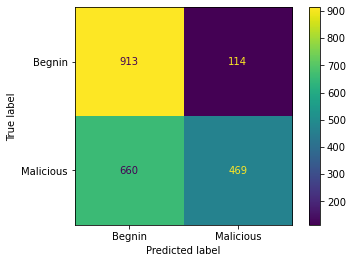

In [91]:
plot_confusion_matrix(AdaB, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# RESULTS COMPARISON

In [92]:
Performance

,Metrics,Decision Tree,Random Forest,KNN,Gaussian Naive Bayes,MLP,SVM,Ada Boosting
0,Accuracy,0.810297,0.823748,0.852041,0.653061,0.841373,0.793599,0.217532
1,Recall,0.820195,0.817538,0.855624,0.504872,0.810452,0.810452,0.415412
2,Precision,0.818021,0.841386,0.860963,0.750988,0.877277,0.798429,0.804460
3,F1-score,0.819107,0.829290,0.858285,0.603814,0.842541,0.804396,0.547897
